In [ ]:
from cgeniepy.table import ScatterData
import xarray as xr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Helvetica"

x = ScatterData("./LGM_d13c_CLEAN.txt", sep='\t', header=0)
x.data.columns = ['lon', 'lat', 'depth', 'd13C', 'core']
#x.set_index(['lat'])
x.data
## convert data frame to float expce the core column
#import pandas as pd

#x.data = x.data.apply(pd.to_numeric, errors='coerce')
#x.drop_na(subset=['d13C'])
#x.detect_basin()

In [ ]:
isinstance(x.data.index, pd.core.indexes.range.RangeIndex)

In [ ]:
import numpy as np
x = np.random.rand(36, 36)
y = x + np.random.rand(36, 36) * 0.5

## calculate skill score
from cgeniepy.skill import ArrComparison
ms = ArrComparison(x, y)
ms.plot()

In [ ]:
x = ScatterData("/Users/yingrui/Science/lgm_foram_census/tidy/forcens_fg_a_tidy.csv")
x.set_index(['Latitude','Longitude'])

In [1]:
from cgeniepy.model import GenieModel
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

model1 = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN", gemflag='biogem')
model2 = GenieModel("/Users/yingrui/Downloads/EXP.R07sm_Corg2", gemflag='biogem')

sst1 = model1.get_var("ocn_sur_temp").isel(time=-1)
sst2 = model2.get_var("ocn_sur_temp").isel(time=-1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': ccrs.Robinson(central_longitude=-80)})

## use differnet colormap
sst1.aes_dict['pcolormesh_kwargs']['cmap'] = plt.cm.Spectral_r
sst1.aes_dict['pcolormesh_kwargs']['vmax'] = 35
sst1.aes_dict['pcolormesh_kwargs']['vmin'] = 0

sst2.aes_dict['pcolormesh_kwargs']['cmap'] = plt.cm.Spectral_r
sst2.aes_dict['pcolormesh_kwargs']['vmax'] = 35
sst2.aes_dict['pcolormesh_kwargs']['vmin'] = 0

sst1.aes_dict['colorbar_label_kwargs']['label'] = "Sea surface temperature (°C)"
sst2.aes_dict['colorbar_label_kwargs']['label'] = "Sea surface temperature (°C)"

sst1.plot(ax=ax[0], colorbar=True, outline=True)
sst2.plot(ax=ax[1], colorbar=True, outline=True)

ax[0].set_title("Modern (0 Ma)")
ax[1].set_title("PETM (55 Ma)")

## save 
#plt.savefig("fig1.png", dpi=300, bbox_inches="tight")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ValueError: /Users/yingrui/Downloads/EXP.R07sm_Corg2 is not a valid directory

In [1]:
from cgeniepy.model import GenieModel

pi_model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN", gemflag='biogem')

x = pi_model.get_var("ocn_sur_temp").isel(time=-1).to_ScatterData()

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
sst2 = model2.get_var("ocn_sur_temp").isel(time=-1)
sst2.array

In [ ]:
sst1.array.attrs['units'] = '°C'

In [ ]:
from cgeniepy.model import GenieModel

test_model = GenieModel("/Users/yingrui/Science/lgm_bcp/model/muffin.CB.worlg4.BASESFeTDTL.SPIN", gemflag="biogem")
test_array = test_model.get_var("ocn_temp")

## search for the nearest point
point = [0,0,30]

test_array.search_grid(point, ignore_na=True)

In [ ]:
from cgeniepy.model import GenieModel
import cmocean as cmo
import matplotlib.pyplot as plt

model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")

fig, ax = plt.subplots(2,1, figsize=(6, 6))

atlatic_po4 = model.get_var('ocn_PO4').isel(time=-1).mask_basin(base='worjh2',basin='Atlantic', subbasin='').mean(dim='lon')

atlatic_po4.aes_dict['pcolormesh_kwargs']['cmap'] = cmo.cm.thermal
atlatic_po4.aes_dict['contour_kwargs']['levels'] = 12

atlatic_po4.plot(ax=ax[0], colorbar=True, contour=True)
atlatic_po4.interpolate().plot(ax=ax[1], colorbar=True, contour=True)

ax[0].set_title("Original")
ax[1].set_title("Interpolated")

fig.tight_layout()
plt.savefig("../publication/fig2.png", dpi=300, bbox_inches="tight")

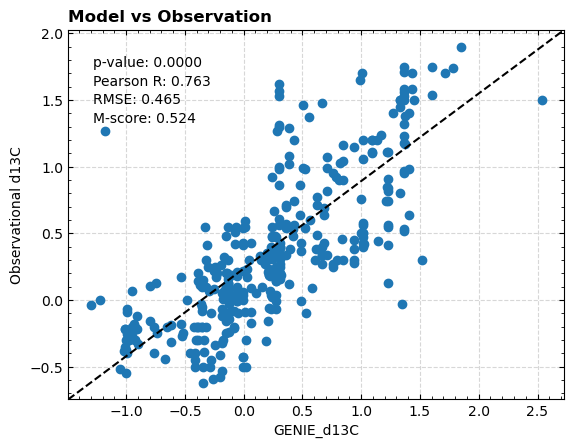

In [11]:
from cgeniepy.table import ScatterData
from cgeniepy.array import GriddedData
from cgeniepy.model import GenieModel

lgm_model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.SPIN", gemflag='biogem')
lgm_d13C = lgm_model.get_var("ocn_DIC_13C").isel(time=-1)

## read in the proxy data and construct ScatterData object
proxy_d13C = ScatterData("~/Science/lgm_bcp/data/lgm_d13C.xlsx")
proxy_d13C.set_index(["Lat", "Lon", "Depth"])

model_data = []

for i in proxy_d13C.data.index:
    lat, lon, depth = i
    pos = (depth, lat, lon)
    data = lgm_d13C.search_point(pos, ignore_na=True)
    model_data.append(data)

## add the model data to the dataframe
proxy_d13C.data["GENIE_d13C"] = model_data

## rename the column
proxy_d13C.data.rename(columns={"LGM":"Observational d13C"}, inplace=True)

## plot the comparison
## by default, model data is in the col, and observational col is in the second
proxy_d13C.compare("GENIE_d13C","Observational d13C").plot()

## save the figure
from matplotlib import pyplot as plt
plt.savefig("fig2.png", dpi=300, bbox_inches="tight")

In [9]:
proxy_d13C.data

,,,Core,HOL,LGM,GENIE_d13C
Lat,Lon,Depth,,,,
-71.13070,-119.91350,2077.0,JR179-TC493,0.800,0.200000,-0.386030
-53.40000,-123.10000,2964.0,RC12-255,0.402,-0.250667,-0.517469
-53.11667,-72.16667,950.0,MD84-560,0.700,0.300000,1.519695
-53.00000,169.00000,602.0,SO136-061,1.750,1.700000,1.709292
-50.38000,169.00000,585.0,MD97-2109,1.720,1.740000,1.779831
...,...,...,...,...,...,...
63.52000,-0.73000,2781.0,HM52-43,1.110,1.290000,0.388978
64.78000,-29.57000,1855.0,V28-14,0.910,1.170000,1.370856
64.80000,-29.60000,1893.0,GIK23519-5,1.200,1.380000,1.370856


In [2]:
proxy_d13C

ScatterData
Columns: Index(['Core', 'Lat', 'Lon', 'Depth', 'HOL', 'LGM'], dtype='object')
Rows: 359

In [ ]:
from cgeniepy.table import ScatterData

proxy_d13C = ScatterData("../data/lgm_d13C.xlsx")
proxy_d13C.set_index(["Lat","Lon"])
proxy_d13C.data['diff']= proxy_d13C.data['LGM'] - proxy_d13C.data['HOL']
proxy_d13C = proxy_d13C.detect_basin()
proxy_d13C.data = proxy_d13C.data.reset_index()
proxy_d13C.set_index(["Lat","Lon","Depth"])


## calculate RMSE
lgm_eco_d13C = lgm_ecogem.get_var("ocn_DIC_13C").isel(time=-1)
lgm_bio_d13C = lgm_biogem.get_var("ocn_DIC_13C").isel(time=-1)

bio_list, eco_list = [], []

for i in proxy_d13C.data.index:
    lat, lon, depth = i
    pos = (depth, lat, lon)
    
    bio_data = lgm_bio_d13C.search_point(pos, ignore_na=True)
    eco_data = lgm_eco_d13C.search_point(pos, ignore_na=True)

    bio_list.append(bio_data)
    eco_list.append(eco_data)

proxy_d13C.data['biogem_lgm'] = bio_list
proxy_d13C.data['ecogem_lgm'] = eco_list

proxy_d13C_indian = proxy_d13C.data[proxy_d13C.data['basin'].str.contains('Indian')]
proxy_d13C_pacific = proxy_d13C.data[proxy_d13C.data['basin'].str.contains('Pacific')]
proxy_d13C_atlantic = proxy_d13C.data[proxy_d13C.data['basin'].str.contains('Atlantic')]

from cgeniepy.skill import DFComparison

print("Indian Ocean (BIOGEM) RMSE", DFComparison(proxy_d13C_indian, 'biogem_lgm', 'LGM').rmse())
print("Indian Ocean (ECOGEM) RMSE", DFComparison(proxy_d13C_indian, 'ecogem_lgm', 'LGM').rmse())

print("Pacific Ocean (BIOGEM) RMSE", DFComparison(proxy_d13C_pacific, 'biogem_lgm', 'LGM').rmse())
print("Pacific Ocean (ECOGEM) RMSE", DFComparison(proxy_d13C_pacific, 'ecogem_lgm', 'LGM').rmse())

print("Atlantic Ocean (BIOGEM) RMSE", DFComparison(proxy_d13C_atlantic, 'biogem_lgm', 'LGM').rmse())
print("Atlantic Ocean (ECOGEM) RMSE", DFComparison(proxy_d13C_atlantic, 'ecogem_lgm', 'LGM').rmse())

rmse_biogem = [DFComparison(proxy_d13C_atlantic, 'biogem_lgm', 'LGM'),
               DFComparison(proxy_d13C_indian, 'biogem_lgm', 'LGM'),
               DFComparison(proxy_d13C_pacific, 'biogem_lgm', 'LGM')]

rmse_ecogem = [DFComparison(proxy_d13C_atlantic, 'ecogem_lgm', 'LGM'),
                DFComparison(proxy_d13C_indian, 'ecogem_lgm', 'LGM'),
                DFComparison(proxy_d13C_pacific, 'ecogem_lgm', 'LGM')]



In [6]:
lgm_model.get_var("ocn_DIC_13C").isel(time=-1)


GriddedData
data=<xarray.DataArray 'ocn_DIC_13C' (zt: 16, lat: 36, lon: 36)>
[20736 values with dtype=float32]
Coordinates:
    time     float64 1e+04
  * lon      (lon) float64 -255.0 -245.0 -235.0 -225.0 ... 65.0 75.0 85.0 95.0
  * lat      (lat) float64 -76.46 -66.44 -59.44 -53.66 ... 59.44 66.44 76.46
  * zt       (zt) float64 40.42 127.6 228.8 ... 3.283e+03 3.894e+03 4.604e+03
Attributes:
    valid_range:  [-999.  999.]
    long_name:    d13C of DIC
    units:        ‰
mutable:
    True

In [ ]:
from cgeniepy.model import GenieModel

pi_model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN", gemflag='biogem')

# Example usage
filename = "biogem_year_09999_500_diag_GLOBAL_AVERAGE.res"
pi_model.get_diag_avg(filename)

In [ ]:
from cgeniepy.model import GenieModel

pi_model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.historical", gemflag='biogem')

df = pi_model.get_ts("ocn_PO4")

In [ ]:
# Set time as index
df.set_index('time (yr)', inplace=True)

# Get columns to plot (exclude time and model)
plot_cols = [col for col in df.columns if col not in ['time (yr)', 'model']]

# Create a figure and a grid of subplots
num_rows = 3  # Number of rows in the grid
num_cols = (len(plot_cols) + num_rows - 1) // num_rows  # Number of columns in the grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4 * num_cols, 3 * num_rows), sharex=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through columns to plot and plot on subplots
for i, col in enumerate(plot_cols):
    axes[i].plot(df.index, df[col])
    axes[i].set_title(col)  # Add title to each subplot

# Hide x-axis label on all subplots except the last row
for ax in axes[:-num_cols]:
    ax.set_xlabel('')

# Common x-axis label for the bottom row of subplots
for ax in axes[-num_cols:]:
    ax.set_xlabel('Time')

# Adjust layout (optional)
plt.tight_layout()

# Remove any unused subplots
for i in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[i])

plt.show()